## What do the distributions of player grades look like?

In [144]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from scipy import stats
import statistics

In [120]:
ROOT = os.path.dirname(os.path.dirname(os.getcwd()))

In [122]:
grades_df = pd.read_csv(f"{ROOT}/data/grades.csv", index_col=[0])

In [107]:
min_vi = min(grades_df.VI)
print(f"Minimum grade given by VI: {min_vi}")
min_ad = min(grades_df.AD)
print(f"Minimum grade given by AD: {min_ad}")
min_fm = min(grades_df.FM)
print(f"Minimum grade given by FM: {min_fm}")

Minimum grade given by VI: 3.5
Minimum grade given by AD: 3.0
Minimum grade given by FM: 2.1


In [109]:
max_vi = max(grades_df.VI)
print(f"Maximum grade given by VI: {max_vi}")
max_ad = max(grades_df.AD)
print(f"Maximum grade given by AD: {max_ad}")
max_fm = max(grades_df.FM)
print(f"Maximum grade given by FM: {max_fm}")

Maximum grade given by VI: 8.5
Maximum grade given by AD: 8.5
Maximum grade given by FM: 9.9


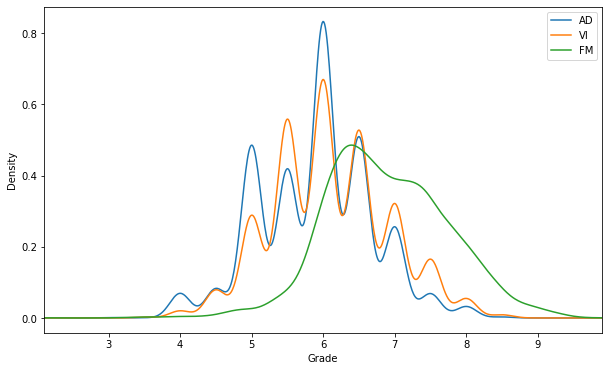

In [139]:
def plot_grades_density(save = False):
    plt.figure(figsize = [10, 6])
    grades_df.AD.plot.density()
    grades_df.VI.plot.density()
    grades_df.FM.plot.density()
    plt.legend()
    plt.xlim(left=min([min_vi, min_ad, min_fm]), right=max([max_vi, max_ad, max_fm]))
    plt.xlabel('Grade')
    if save:
        plt.savefig(f"{ROOT}/res/figures/grades_density.png")
    plt.show()

plot_grades_density(save=True)

Plots seem to be normally distributed, lets check to make sure

In [129]:
print(f"P value for normality VI: {stats.normaltest(grades_df.VI, nan_policy='omit').pvalue}")
print(f"P value for normality AD: {stats.normaltest(grades_df.AD, nan_policy='omit').pvalue}")
print(f"P value for normality FM: {stats.normaltest(grades_df.FM, nan_policy='omit').pvalue}")

P value for normality VI: 3.833818661250702e-06
P value for normality AD: 0.48789191630134
P value for normality FM: 2.663713769366482e-09


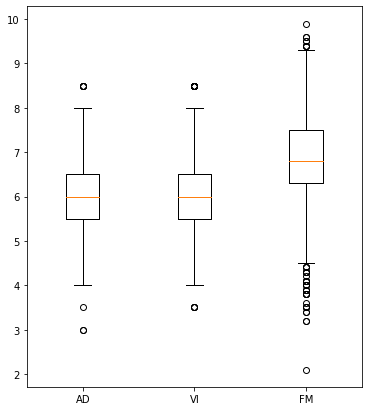

In [165]:
plt.figure(figsize=[6, 7])
plt.boxplot([grades_df.AD[~np.isnan(grades_df.AD)], grades_df.VI[~np.isnan(grades_df.VI)], grades_df.FM[~np.isnan(grades_df.FM)]])
plt.xticks([1, 2, 3], ['AD', 'VI', 'FM'])
plt.show()

In [166]:
grades_df

,player,AD,VI,home,away,time,date,id,FM,Minutes played,...,Clearance off the line,Last man tackle,Own goal,Conceded penalty,Error led to goal,Penalties won,Errors led to goal,Crosses,Penalties miss,hashtag
0,edson alvarez,5.0,5.0,AFC Ajax,AZ Alkmaar,16:45,2021-12-12,edson alvarez#ajaaz,6.7,58.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#ajaaz
1,antony,5.5,6.5,AFC Ajax,AZ Alkmaar,16:45,2021-12-12,antony#ajaaz,7.5,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#ajaaz
2,steven berghuis,5.5,5.5,AFC Ajax,AZ Alkmaar,16:45,2021-12-12,steven berghuis#ajaaz,7.1,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#ajaaz
3,daley blind,5.0,5.0,AFC Ajax,AZ Alkmaar,16:45,2021-12-12,daley blind#ajaaz,7.1,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#ajaaz
4,danilo,NaN,NaN,AFC Ajax,AZ Alkmaar,16:45,2021-12-12,danilo#ajaaz,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ajaaz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7686,daan huisman,NaN,NaN,NaN,NaN,NaN,NaN,daan huisman#vitspa,5.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#vitspa
7687,riechedly bazoer,NaN,NaN,NaN,NaN,NaN,NaN,riechedly bazoer#vitspa,6.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#vitspa
7688,laurent jans,NaN,NaN,NaN,NaN,NaN,NaN,laurent jans#vitspa,6.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#vitspa
7689,michael pinto,NaN,NaN,NaN,NaN,NaN,NaN,michael pinto#vitspa,6.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#vitspa
